In [1]:
import os
import pickle

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch.nn as nn
import torch.optim
from tqdm.auto import tqdm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import multitask.dataset as dataset
from multitask.models.task_switching import get_task_model
import multitask.models.task_switching.hooks as hooks
from multitask.utils.training import get_device
from multitask.utils.argparse import check_runs

Run first:
- `results_linear_decoder_all.ipynb`
- `results_linear_decoder_first.ipynb`
- `results_linear_decoder_removed.ipynb`

In [2]:
plt.style.use('../style/plots.mplstyle')

In [3]:
path_data = os.path.join('..', '..', 'data')
path_figure = os.path.join('svg', 'figureS13d_linear_decoder.svg')
path_results_individual = os.path.join('pickle', 'results_linear_decoder_individual.pickle')
path_results_parallel = os.path.join('pickle', 'results_linear_decoder_parallel.pickle')
path_results_all = os.path.join('pickle', 'results_linear_decoder_task_switching.pickle')

In [4]:
with open(path_results_individual, 'rb') as handle:
    results_individual = pickle.load(handle)

with open(path_results_parallel, 'rb') as handle:
    results_parallel = pickle.load(handle)

with open(path_results_all, 'rb') as handle:
    results_all = pickle.load(handle)

In [5]:
mean_results_individual_letters = results_individual['letters'].mean(axis=0)
std_results_individual_letters = results_individual['letters'].std(axis=0)

mean_results_individual_tasks = results_individual['tasks'].mean(axis=0)
std_results_individual_tasks = results_individual['tasks'].std(axis=0)

mean_results_individual_congruency = results_individual['congruency'].mean(axis=0)
std_results_individual_congruency = results_individual['congruency'].std(axis=0)

mean_results_individual_output = results_individual['output'].mean(axis=0)
std_results_individual_output = results_individual['output'].std(axis=0)

In [6]:
mean_results_parallel_letters = results_parallel['letters'].mean(axis=0)
std_results_parallel_letters = results_parallel['letters'].std(axis=0)

mean_results_parallel_tasks = results_parallel['tasks'].mean(axis=0)
std_results_parallel_tasks = results_parallel['tasks'].std(axis=0)

mean_results_parallel_congruency = results_parallel['congruency'].mean(axis=0)
std_results_parallel_congruency = results_parallel['congruency'].std(axis=0)

mean_results_parallel_output = results_parallel['output'].mean(axis=0)
std_results_parallel_output = results_parallel['output'].std(axis=0)

In [7]:
mean_results_all_letters = results_all['letters'].mean(axis=0)
std_results_all_letters = results_all['letters'].std(axis=0)

mean_results_all_tasks = results_all['tasks'].mean(axis=0)
std_results_all_tasks = results_all['tasks'].std(axis=0)

mean_results_all_congruency = results_all['congruency'].mean(axis=0)
std_results_all_congruency = results_all['congruency'].std(axis=0)

mean_results_all_output = results_all['output'].mean(axis=0)
std_results_all_output = results_all['output'].std(axis=0)

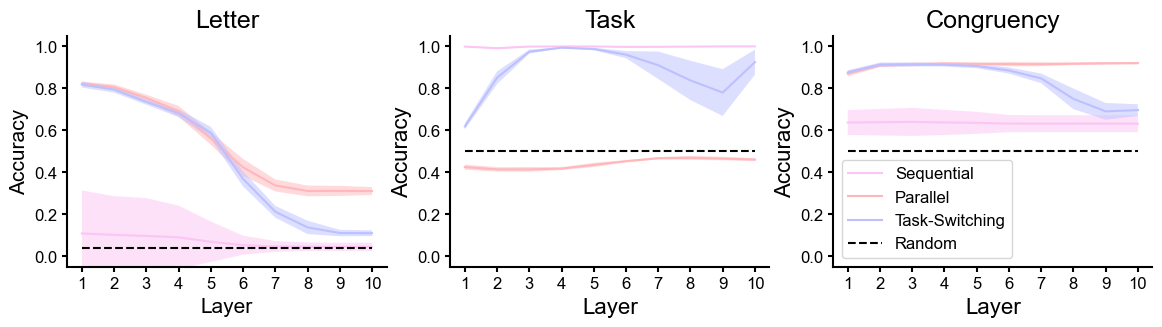

In [8]:
num_layers = len(mean_results_all_letters)
layers = range(1, num_layers+1)

fig, ax = plt.subplots(1, 3, figsize=(14, 3))


ax[0].plot(layers,
         mean_results_individual_letters)
ax[0].fill_between(layers,
                 mean_results_individual_letters-std_results_individual_letters,
                 mean_results_individual_letters+std_results_individual_letters,
                 alpha=0.5)

ax[0].plot(layers,
         mean_results_parallel_letters)
ax[0].fill_between(layers,
                 mean_results_parallel_letters-std_results_parallel_letters,
                 mean_results_parallel_letters+std_results_parallel_letters,
                 alpha=0.5)

ax[0].plot(layers,
           mean_results_all_letters)
ax[0].fill_between(layers,
                 mean_results_all_letters-std_results_all_letters,
                 mean_results_all_letters+std_results_all_letters,
                 alpha=0.5)

ax[0].plot(layers, num_layers * [1/26], 'k--')


ax[0].set_ylim(-0.05, 1.05)
ax[0].set_xlabel('Layer', fontsize=15)
ax[0].set_ylabel('Accuracy', fontsize=15)
ax[0].set_title('Letter', fontsize=18)
ax[0].tick_params(labelsize=12)
ax[0].xaxis.set_ticks(range(1, num_layers+1))


ax[1].plot(layers,
           mean_results_individual_tasks)
ax[1].fill_between(layers,
                 mean_results_individual_tasks-std_results_individual_tasks,
                 mean_results_individual_tasks+std_results_individual_tasks,
                 alpha=0.5)
ax[1].plot(layers,
         mean_results_parallel_tasks)
ax[1].fill_between(layers,
                 mean_results_parallel_tasks-std_results_parallel_tasks,
                 mean_results_parallel_tasks+std_results_parallel_tasks,
                 alpha=0.5)

ax[1].plot(layers,
           mean_results_all_tasks)
ax[1].fill_between(layers,
                   mean_results_all_tasks-std_results_all_tasks,
                   mean_results_all_tasks+std_results_all_tasks,
                   alpha=0.5)


ax[1].plot(layers, num_layers * [0.5], 'k--')

ax[1].set_ylim(-0.05, 1.05)
ax[1].set_ylabel('Accuracy', fontsize=16)
ax[1].set_xlabel('Layer', fontsize=16)
ax[1].set_title('Task', fontsize=18)
ax[1].tick_params(labelsize=12)
ax[1].xaxis.set_ticks(range(1, num_layers+1))

ax[2].plot(layers,
           mean_results_individual_congruency)
ax[2].fill_between(layers,
                 mean_results_individual_congruency-std_results_individual_congruency,
                 mean_results_individual_congruency+std_results_individual_congruency,
                 alpha=0.5)

ax[2].plot(layers,
           mean_results_parallel_congruency)
ax[2].fill_between(layers,
                 mean_results_parallel_congruency-std_results_parallel_congruency,
                 mean_results_parallel_congruency+std_results_parallel_congruency,
                 alpha=0.5)

ax[2].plot(layers,
           mean_results_all_congruency)
ax[2].fill_between(layers,
                 mean_results_all_congruency-std_results_all_congruency,
                 mean_results_all_congruency+std_results_all_congruency,
                 alpha=0.5)

ax[2].plot(layers, num_layers * [0.5], 'k--')


ax[2].set_ylim(-0.05, 1.05)
ax[2].set_xlabel('Layer', fontsize=16)
ax[2].set_ylabel('Accuracy', fontsize=16)
ax[2].set_title('Congruency', fontsize=18)
ax[2].tick_params(labelsize=12)
ax[2].xaxis.set_ticks(range(1, num_layers+1))
ax[2].legend(['Sequential', 'Parallel', 'Task-Switching', 'Random'], prop={'size':12}, loc='best')

fig.savefig(path_figure, transparent=True, bbox_inches='tight')
plt.show()

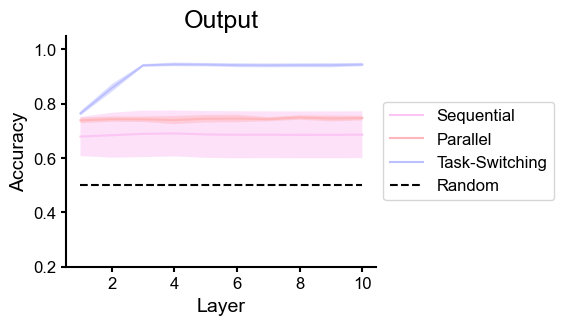

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))


ax.plot(layers,
           mean_results_individual_output)
ax.fill_between(layers,
                 mean_results_individual_output-std_results_individual_output,
                 mean_results_individual_output+std_results_individual_output,
                 alpha=0.5)

ax.plot(layers,
           mean_results_parallel_output)
ax.fill_between(layers,
                 mean_results_parallel_output-std_results_parallel_output,
                 mean_results_parallel_output+std_results_parallel_output,
                 alpha=0.5)

ax.plot(layers,
           mean_results_all_output)
ax.fill_between(layers,
                 mean_results_all_output-std_results_all_output,
                 mean_results_all_output+std_results_all_output,
                 alpha=0.5)


ax.plot(layers, num_layers * [0.5], 'k--')


ax.set_ylim(0.2, 1.05)
ax.set_ylabel('Accuracy', fontsize=14)
ax.set_title('Output', fontsize=18)
ax.set_xlabel('Layer', fontsize=14)
ax.legend(['Sequential', 'Parallel', 'Task-Switching', 'Random'],
          prop={'size':12},
          loc='center right',
          bbox_to_anchor=[1.6, 0.5])

ax.tick_params(labelsize=12)

plt.show()